### Risk Size in Normal Distribution

In [155]:
# Set up our initial variables.
win_pct <- 52.395  # Overall Winning Percentage
total_wagers <- 32 * 16 * 1.5  # Total Teams * Games Per Team * Average Bets Per Game
starting_book <- 1000.00  # Start the season w/ $1000.00
risk_size <- 1.0  # How much of our total book are we willing to risk per bet, as a percentage.

# Set up our coin using the weights from our winning percentage
my.coin <- c(1 - (win_pct / 100), win_pct / 100)
print("Coin")
my.coin

# Set up the potential outcome of a bet.  Assuming Bet 1 to win 1 on dogs, bet 1 on fav's.
# Adjust the result to more accurately reflect your +EV.
potential_unit_result <- c(-1, 1)
rslt <- sample(potential_unit_result, size=total_wagers, prob=my.coin, replace=T)

#Print out the initial items.
print("Bets Placed")
total_wagers
print("Total Units Won")
sum(rslt)



[1] "Coin"


[1] 0.47605 0.52395

[1] "Bets Placed"


[1] 768

[1] "Total Units Won"


[1] 8

***
#### Betting Function
Create the various functions that will iterate through our betting result units and place those bets according to our money management system.


In [151]:
bet.percent_of_book <- function(unit_result, risk_percent, book) {
    bet_amount <- book * risk_percent / 100
    return (unit_result * bet_amount)
}


***
#### Place the Bets!

Iterate through each bet and calculate the result 


In [156]:
book_result <- starting_book
min_result <- starting_book
max_result <- starting_book
book_history <- c(1:length(rslt))

for(i in seq(rslt)) {
    book_result <- book_result + bet.percent_of_book(rslt[i], risk_size, book_result)
    book_history[i] <- book_result
    if (book_result < min_result){min_result <- book_result}
    if (book_result > max_result){max_result <- book_result}
    }

print("Lowest Draw Down")
round(min_result,2)

print("Largest Book Size")
round(max_result, 2)

print("Season End Book Size")
round(book_result, 2)
paste(round(book_result / starting_book, 2) * 100.0 , "%")


[1] "Lowest Draw Down"


[1] 852.61

[1] "Largest Book Size"


[1] 1249.08

[1] "Season End Book Size"


[1] 1042.48

[1] "104 %"

***
#### Graph the Results

Graph the book size history and unit size history.  
You can refresh the page to generate new results.

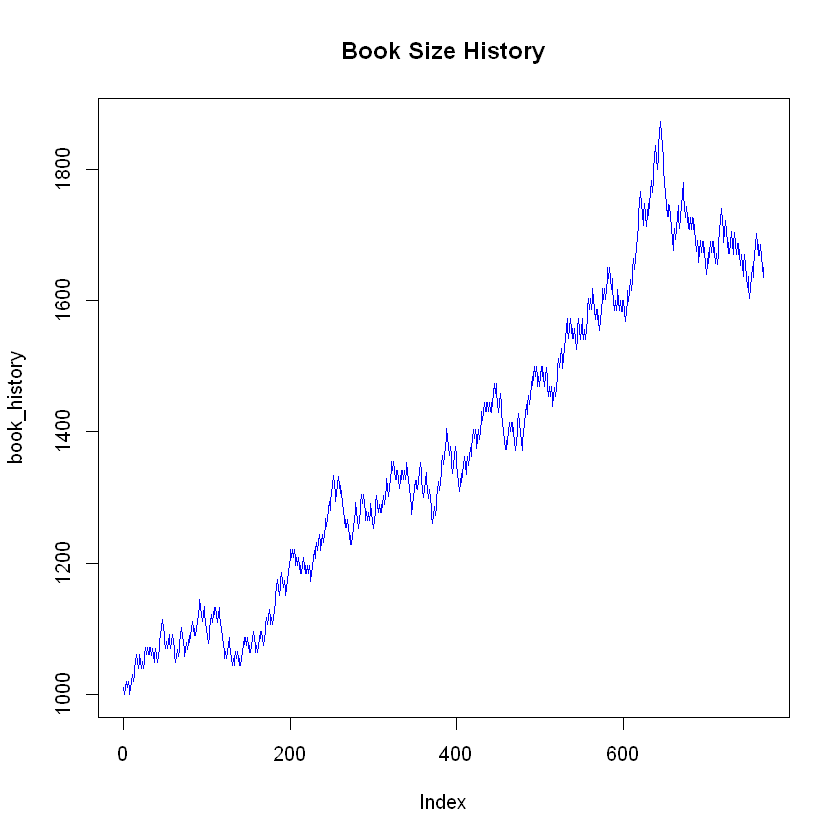

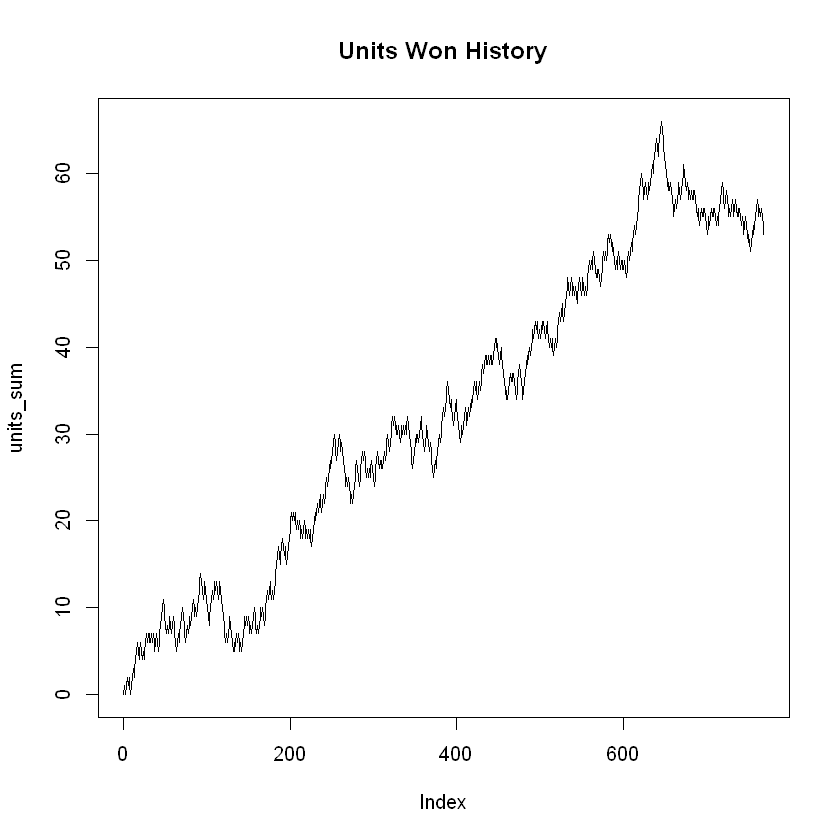

In [153]:
units_sum = c(0, cumsum(rslt))[1:length(rslt)]

plot(book_history, type="l", col="blue", main="Book Size History")
plot(units_sum, type="l", col="black", main="Units Won History")